# Creating Bode Plots

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE30338](https://github.com/jckantor/CBE30338). 

Demonstrate the contruction of a Bode Plot using the  [Python Control Systems Library](https://github.com/python-control/python-control).

## Initializations

These are the standard initializations with the addition of the [Python Control Systems Library](https://github.com/python-control/python-control). The control library is imported with full prefix `control`.  The current version of the control library makes use of `hold` command from matplotlib which has been deprecated in recent releases. The warnings library is imported in order to turn off unneeded warnings that come from control library.

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control

import warnings
warnings.filterwarnings('ignore')

## Creating Bode Plots

### Specify a Transfer Function

Given a transfer function with time delay

$$G_p(s) = \frac{0.2 e^{-0.25s}}{s^2 + 0.5 s + 1}$$

the task is to construct a Bode plot.

The current version of the Python Control Systems Library does not provide a specific representation for time delay. It does, however, provide a function `pade` to create high-order Pade approximations to time delay.

In [12]:
G = control.tf([0.2],[1, 0.5, 1])
print("Without Time Delay G(s) = ", G)

(num,den) = control.pade(0.25,3)
Gp = G*control.tf(num,den)
print("With Time Delay Gp = ", Gp)

Without Time Delay G(s) =  
      0.2
---------------
s^2 + 0.5 s + 1

With Time Delay Gp =  
         -0.2 s^3 + 9.6 s^2 - 192 s + 1536
---------------------------------------------------
s^5 + 48.5 s^4 + 985 s^3 + 8208 s^2 + 4800 s + 7680



### Bode Plot using Default Options

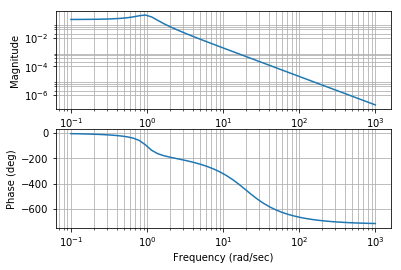

In [11]:
mag,phase,omega = control.bode(Gp);

### Specify Frequency Range

The default frequency range created by `bode` is often too wide. Fortunately, it is possible to specify the frequency axis in radians using the `numpy.logspace` function.

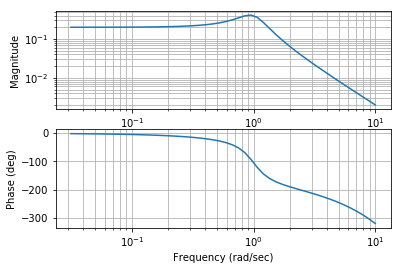

In [14]:
w = np.logspace(-1.5,1)
mag,phase,omega = control.bode(Gp,w)

### Setting Other Plotting Options

Bode plots can be customized with several key options as demonstrated in this cell. Note that setting `Hz = True` only changes the x-axis of the resulting bode plot, both input and output frequencies are still specified in radians per unit time.

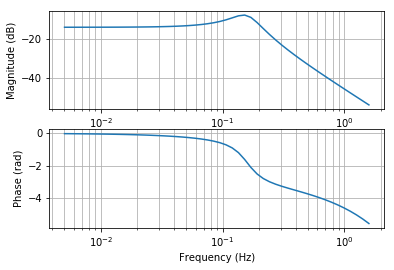

In [17]:
mag,phase,omega = control.bode(Gp,w,Hz=True,dB=True,deg=False)

## Adding Features to the Bode Plot

In addition to creating plots, the `bode` function returns numpy arrays containing the magnitude, phase, and frequency.  

### Crossover Frequency and Gain at Crossover

This data can be used to annotate or add features to a Bode plot. The following cell interpolates the phase data to find the crossover frequency, then interpolates the magnitude data to find the gain at crossover.

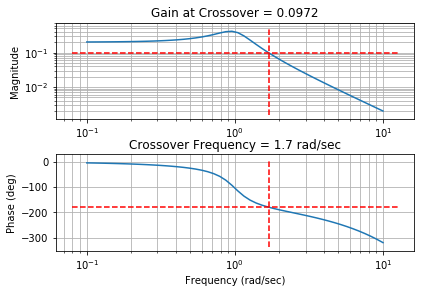

In [20]:
w = np.logspace(-1,1)
mag,phase,omega = control.bode(Gp,w)
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

# get the subplots axes
ax1,ax2 = plt.gcf().axes

# add features to the magnitude plot
plt.sca(ax1)
plt.plot(plt.xlim(),[Kcu,Kcu],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Gain at Crossover = {0:.3g}".format(Kcu))

# add features to the phase plot
plt.sca(ax2)
plt.plot(plt.xlim(),[-180,-180],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Crossover Frequency = {0:.3g} rad/sec".format(wc))